In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use("default")
pd.set_option("display.max_columns", 200)


os.makedirs("outputs", exist_ok=True)


In [4]:
trades_path = "/content/ds_jayanth/csv_files/historical_data.csv"      # rename if needed
sentiment_path = "/content/ds_jayanth/csv_files/fear_greed_index.csv"    # rename if needed

trades_raw = pd.read_csv(trades_path)
sentiment_raw = pd.read_csv(sentiment_path)

trades_raw.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [7]:
sentiment_raw.tail(10)

,timestamp,value,classification,date
2634,1745386200,72,Greed,2025-04-23
2635,1745472600,63,Greed,2025-04-24
2636,1745559000,60,Greed,2025-04-25
2637,1745645400,65,Greed,2025-04-26
2638,1745731800,61,Greed,2025-04-27
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01
2643,1746163800,67,Greed,2025-05-02


In [8]:
trades = trades_raw.copy()

# 1) Normalize column names
trades.columns = [c.strip().lower().replace(" ", "_") for c in trades.columns]
trades.columns

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp'],
      dtype='object')

In [9]:
trades["timestamp_ist"] = pd.to_datetime(
    trades["timestamp_ist"],
    format="%d-%m-%Y %H:%M",
    errors="coerce"
)

trades["date"] = trades["timestamp_ist"].dt.date

trades[["timestamp_ist", "date"]].head()


,timestamp_ist,date
0,2024-12-02 22:50:00,2024-12-02
1,2024-12-02 22:50:00,2024-12-02
2,2024-12-02 22:50:00,2024-12-02
3,2024-12-02 22:50:00,2024-12-02
4,2024-12-02 22:50:00,2024-12-02


In [10]:
trades.head()

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [11]:
numeric_cols = ["execution_price", "size_tokens", "size_usd",
                "start_position", "closed_pnl", "fee"]

for col in numeric_cols:
    if col in trades.columns:
        trades[col] = pd.to_numeric(trades[col], errors="coerce")

# Notional (USD exposure) - here it's basically size_usd
trades["notional_usd"] = trades["size_usd"]

# Profit flags
trades["is_profitable"] = trades["closed_pnl"] > 0
trades["is_loss"] = trades["closed_pnl"] < 0

# Side: BUY -> +1, SELL -> -1
trades["side_clean"] = trades["side"].astype(str).str.upper().str.strip()
trades["direction_num"] = np.where(trades["side_clean"] == "BUY", 1,
                                   np.where(trades["side_clean"] == "SELL", -1, np.nan))

trades.head()


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date,notional_usd,is_profitable,is_loss,side_clean,direction_num
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,7872.16,False,False,BUY,1.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,127.68,False,False,BUY,1.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1150.63,False,False,BUY,1.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1142.04,False,False,BUY,1.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,69.75,False,False,BUY,1.0


In [12]:
if "leverage" in trades.columns:
    trades["leverage"] = pd.to_numeric(trades["leverage"], errors="coerce")
    trades["risk_exposure"] = trades["leverage"] * trades["notional_usd"]
else:
    trades["risk_exposure"] = trades["notional_usd"]  # fallback


In [13]:
trades

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date,notional_usd,is_profitable,is_loss,side_clean,direction_num,risk_exposure
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,7872.16,False,False,BUY,1.0,7872.16
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,127.68,False,False,BUY,1.0,127.68
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1150.63,False,False,BUY,1.0,1150.63
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1142.04,False,False,BUY,1.0,1142.04
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,69.75,False,False,BUY,1.0,69.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,2025-04-25 15:35:00,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12,2025-04-25,420.80,False,True,SELL,-1.0,420.80
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,2025-04-25 15:35:00,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12,2025-04-25,2338.63,False,True,SELL,-1.0,2338.63
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,2025-04-25 15:35:00,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12,2025-04-25,466.16,False,True,SELL,-1.0,466.16
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,2025-04-25 15:35:00,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12,2025-04-25,3963.38,False,True,SELL,-1.0,3963.38


In [14]:
sentiment = sentiment_raw.copy()
sentiment.columns = [c.strip().lower().replace(" ", "_") for c in sentiment.columns]
sentiment.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [15]:
sentiment["date"] = pd.to_datetime(sentiment["date"], errors="coerce").dt.date
sentiment["classification"] = sentiment["classification"].astype(str).str.strip().str.title()

sentiment["classification"].value_counts()


,count
classification,
Fear,781
Greed,633
Extreme Fear,508
Neutral,396
Extreme Greed,326


In [16]:
# Mapping 5 labels into 3 groups: Fear, Neutral, Greed
def map_to_group(x):
    x = str(x).title()
    if x in ["Fear", "Extreme Fear"]:
        return "Fear"
    elif x in ["Greed", "Extreme Greed"]:
        return "Greed"
    else:
        return "Neutral"

sentiment["sentiment_group"] = sentiment["classification"].apply(map_to_group)

# Optional binary class (Fear=0, Greed=1, Neutral=NaN)
sentiment_map = {"Fear": 0, "Greed": 1, "Neutral": np.nan}
sentiment["sentiment_binary"] = sentiment["sentiment_group"].map(sentiment_map)

sentiment["sentiment_group"].value_counts()


,count
sentiment_group,
Fear,1289
Greed,959
Neutral,396


In [17]:
# Convert date to datetime if needed
trades["date"] = pd.to_datetime(trades["date"]).dt.date
sentiment["date"] = pd.to_datetime(sentiment["date"]).dt.date

# Merge on date
merged = trades.merge(
    sentiment[["date", "value", "classification", "sentiment_group", "sentiment_binary"]],
    on="date",
    how="left"
)

merged.head()


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date,notional_usd,is_profitable,is_loss,side_clean,direction_num,risk_exposure,value,classification,sentiment_group,sentiment_binary
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,7872.16,False,False,BUY,1.0,7872.16,80.0,Extreme Greed,Greed,1.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,127.68,False,False,BUY,1.0,127.68,80.0,Extreme Greed,Greed,1.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1150.63,False,False,BUY,1.0,1150.63,80.0,Extreme Greed,Greed,1.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1142.04,False,False,BUY,1.0,1142.04,80.0,Extreme Greed,Greed,1.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,69.75,False,False,BUY,1.0,69.75,80.0,Extreme Greed,Greed,1.0


In [18]:
merged["sentiment_group"].value_counts(dropna=False)


,count
sentiment_group,
Greed,90295
Fear,83237
Neutral,37686
NaN,6


In [19]:
sentiment_stats = (
    merged
    .groupby("sentiment_group")
    .agg(
        num_trades=("account", "count"),
        total_notional=("notional_usd", "sum"),
        avg_notional=("notional_usd", "mean"),
        avg_pnl=("closed_pnl", "mean"),
        median_pnl=("closed_pnl", "median"),
        win_rate=("is_profitable", "mean")
    )
    .reset_index()
)

sentiment_stats


,sentiment_group,num_trades,total_notional,avg_notional,avg_pnl,median_pnl,win_rate
0,Fear,83237,5.978091e+08,7182.011019,49.212077,0.0,0.407871
1,Greed,90295,4.130477e+08,4574.424490,53.882281,0.0,0.420311
2,Neutral,37686,1.802421e+08,4782.732661,34.307718,0.0,0.396991


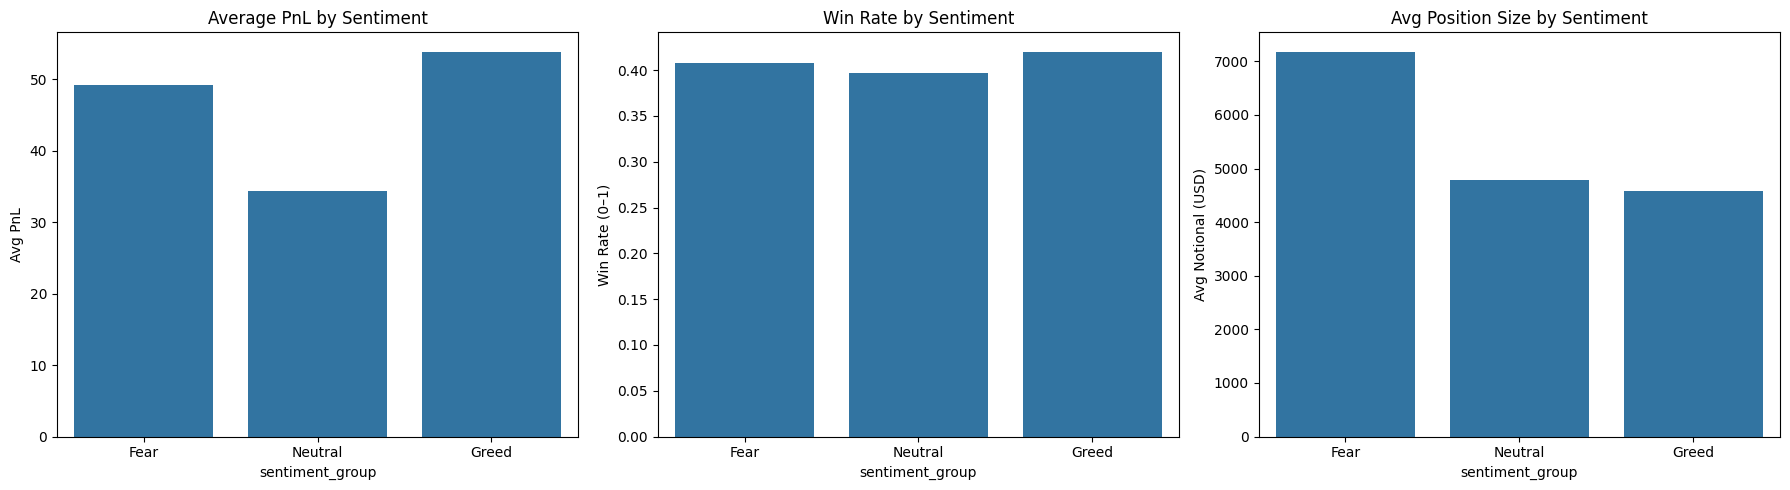

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

order = ["Fear", "Neutral", "Greed"]

fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.barplot(data=sentiment_stats, x="sentiment_group", y="avg_pnl",
            order=order, ax=axes[0])
axes[0].set_title("Average PnL by Sentiment")
axes[0].set_ylabel("Avg PnL")

sns.barplot(data=sentiment_stats, x="sentiment_group", y="win_rate",
            order=order, ax=axes[1])
axes[1].set_title("Win Rate by Sentiment")
axes[1].set_ylabel("Win Rate (0–1)")

sns.barplot(data=sentiment_stats, x="sentiment_group", y="avg_notional",
            order=order, ax=axes[2])
axes[2].set_title("Avg Position Size by Sentiment")
axes[2].set_ylabel("Avg Notional (USD)")

plt.tight_layout()
plt.savefig("outputs/core_metrics_by_sentiment.png")
plt.show()


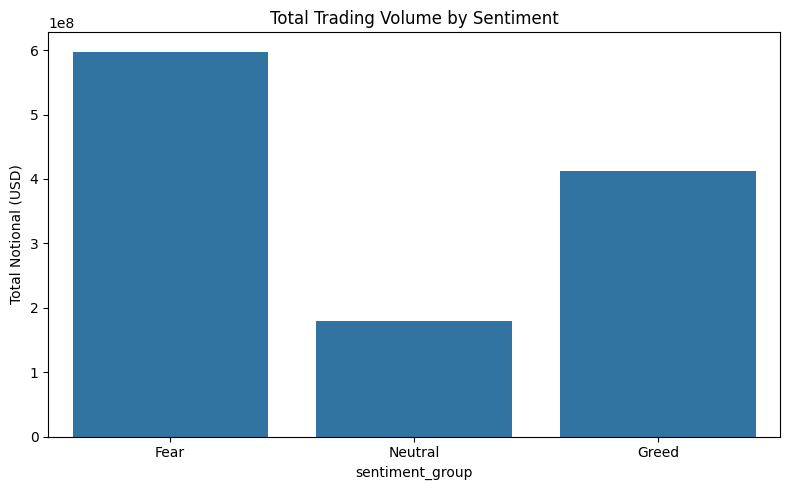

In [21]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=sentiment_stats, x="sentiment_group", y="total_notional",
            order=order, ax=ax)
ax.set_title("Total Trading Volume by Sentiment")
ax.set_ylabel("Total Notional (USD)")
plt.tight_layout()
plt.savefig("outputs/total_volume_by_sentiment.png")
plt.show()


In [22]:
buy_sell_stats = (
    merged
    .groupby(["sentiment_group", "side_clean"])
    .size()
    .reset_index(name="count")
)

buy_sell_stats


,sentiment_group,side_clean,count
0,Fear,BUY,41205
1,Fear,SELL,42032
2,Greed,BUY,42516
3,Greed,SELL,47779
4,Neutral,BUY,18969
5,Neutral,SELL,18717


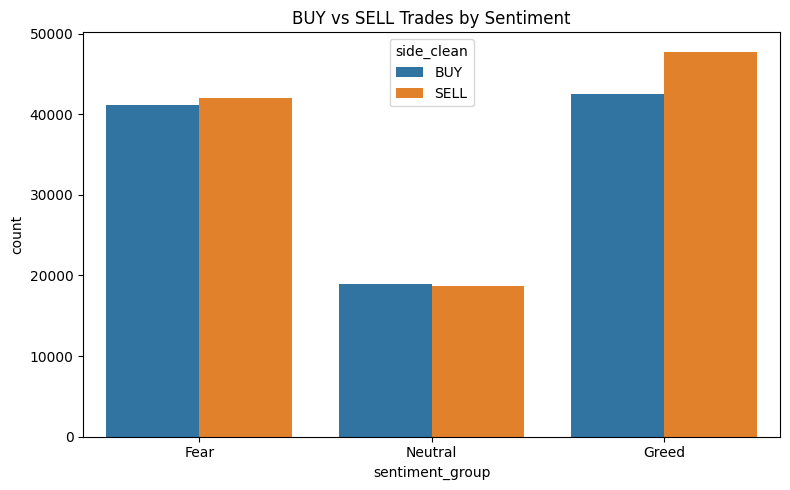

In [23]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(data=buy_sell_stats, x="sentiment_group", y="count",
            hue="side_clean", order=order, ax=ax)
ax.set_title("BUY vs SELL Trades by Sentiment")
plt.tight_layout()
plt.savefig("outputs/buy_vs_sell_by_sentiment.png")
plt.show()


In [24]:
symbol_stats = (
    merged
    .groupby(["coin", "sentiment_group"])
    .agg(
        num_trades=("account", "count"),
        avg_pnl=("closed_pnl", "mean"),
        win_rate=("is_profitable", "mean"),
        avg_notional=("notional_usd", "mean")
    )
    .reset_index()
)

symbol_stats.head()


,coin,sentiment_group,num_trades,avg_pnl,win_rate,avg_notional
0,@1,Fear,1,0.000000,0.000000,0.580000
1,@1,Greed,33,15.052916,0.393939,110.942727
2,@10,Fear,3,-0.021161,0.000000,12.420000
3,@10,Greed,1,0.000000,0.000000,0.050000
4,@100,Greed,4,6.906785,0.500000,10.667500


In [25]:
account_stats = (
    merged
    .groupby(["account", "sentiment_group"])
    .agg(
        num_trades=("coin", "count"),
        total_pnl=("closed_pnl", "sum"),
        avg_pnl=("closed_pnl", "mean"),
        win_rate=("is_profitable", "mean"),
        avg_notional=("notional_usd", "mean")
    )
    .reset_index()
)

account_stats.head()


,account,sentiment_group,num_trades,total_pnl,avg_pnl,win_rate,avg_notional
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,1878,1.238143e+06,659.287949,0.518104,16916.688365
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,1519,2.364369e+05,155.653018,0.102041,13234.263667
2,0x083384f897ee0f19899168e3b1bec365f52a9012,Neutral,421,1.256501e+05,298.456334,0.581948,23336.999311
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Fear,2792,-5.893890e+03,-2.110992,0.467407,1053.107160
4,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Greed,3768,6.571229e+04,17.439568,0.440021,2125.939583


In [26]:
active_accounts = (
    merged.groupby("account")["coin"].count()
    .reset_index(name="total_trades")
    .query("total_trades >= 50")
)

active_accounts.head()


,account,total_trades
0,0x083384f897ee0f19899168e3b1bec365f52a9012,3818
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,7280
2,0x271b280974205ca63b716753467d5a371de622ab,3809
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,13311
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3239


In [27]:
active_behavior = account_stats.merge(active_accounts, on="account")
active_behavior.head()


,account,sentiment_group,num_trades,total_pnl,avg_pnl,win_rate,avg_notional,total_trades
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,1878,1.238143e+06,659.287949,0.518104,16916.688365,3818
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,1519,2.364369e+05,155.653018,0.102041,13234.263667,3818
2,0x083384f897ee0f19899168e3b1bec365f52a9012,Neutral,421,1.256501e+05,298.456334,0.581948,23336.999311,3818
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Fear,2792,-5.893890e+03,-2.110992,0.467407,1053.107160,7280
4,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Greed,3768,6.571229e+04,17.439568,0.440021,2125.939583,7280


In [28]:
symbol_stats = (
    merged
    .groupby(["coin", "sentiment_group"])
    .agg(
        num_trades=("account", "count"),
        avg_pnl=("closed_pnl", "mean"),
        avg_notional=("notional_usd", "mean"),
        win_rate=("is_profitable", "mean")
    )
    .reset_index()
)

symbol_stats.sort_values("num_trades", ascending=False).head(20)


,coin,sentiment_group,num_trades,avg_pnl,avg_notional,win_rate
262,HYPE,Fear,38229,34.591283,2421.740222,0.424259
7,@107,Greed,18801,144.298770,1988.008911,0.515770
264,HYPE,Neutral,17324,17.322803,1591.490816,0.413011
263,HYPE,Greed,12452,26.180067,1753.815628,0.389335
188,BTC,Fear,11635,41.745293,29021.374007,0.373700
189,BTC,Greed,9676,22.360263,21515.265889,0.334126
6,@107,Fear,6981,-21.286379,1527.951106,0.378026
408,SOL,Fear,5792,146.197132,13478.222623,0.439227
222,ETH,Greed,5598,55.201848,9527.545243,0.257949
190,BTC,Neutral,4753,34.921175,20699.919487,0.328845


In [29]:
account_stats = (
    merged
    .groupby(["account", "sentiment_group"])
    .agg(
        num_trades=("coin", "count"),
        total_pnl=("closed_pnl", "sum"),
        avg_pnl=("closed_pnl", "mean"),
        avg_notional=("notional_usd", "mean"),
        win_rate=("is_profitable", "mean")
    )
    .reset_index()
)

account_stats.head()


,account,sentiment_group,num_trades,total_pnl,avg_pnl,avg_notional,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,1878,1.238143e+06,659.287949,16916.688365,0.518104
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,1519,2.364369e+05,155.653018,13234.263667,0.102041
2,0x083384f897ee0f19899168e3b1bec365f52a9012,Neutral,421,1.256501e+05,298.456334,23336.999311,0.581948
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Fear,2792,-5.893890e+03,-2.110992,1053.107160,0.467407
4,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Greed,3768,6.571229e+04,17.439568,2125.939583,0.440021


In [30]:
active_accounts = account_stats[account_stats["num_trades"] > 50]
active_accounts.sort_values("win_rate", ascending=False).head(10)


,account,sentiment_group,num_trades,total_pnl,avg_pnl,avg_notional,win_rate
52,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,Greed,6449,306664.249464,47.552217,2897.795917,0.835633
51,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,Fear,1980,75037.113718,37.897532,2220.284889,0.801010
35,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,Neutral,672,97380.090931,144.910850,5457.374167,0.752976
53,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,Neutral,1464,-2605.956471,-1.780025,1806.999515,0.715164
21,0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6,Fear,98,4367.112673,44.562374,4101.262245,0.693878
43,0x6d6a4b953f202f8df5bed40692e7fd865318264a,Greed,412,103395.478180,250.959898,579.999442,0.667476
73,0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0,Greed,364,90581.077847,248.849115,1500.220110,0.648352
28,0x430f09841d65beb3f27765503d0f850b8bce7713,Greed,787,351965.440509,447.224194,1650.759199,0.644219
2,0x083384f897ee0f19899168e3b1bec365f52a9012,Neutral,421,125650.116740,298.456334,23336.999311,0.581948
14,0x2c229d22b100a7beb69122eed721cee9b24011dd,Neutral,1015,42292.843076,41.667826,3194.968621,0.575369


In [32]:
# trades  -> trades_clean
trades.to_csv("/content/ds_jayanth/csv_files/trades_clean.csv", index=False)

# sentiment -> sentiment_clean
sentiment.to_csv("/content/ds_jayanth/csv_files/sentiment_clean.csv", index=False)

# merged -> merged_trades_sentiment
merged.to_csv("/content/ds_jayanth/csv_files/merged_trades_sentiment.csv", index=False)


In [34]:
# ------------------------------------------------------------
# SAVE ALL PLOTS TO outputs/
# ------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Example 1 — Avg PnL plot
plt.figure(figsize=(7,5))
sns.barplot(data=sentiment_stats, x="sentiment_group", y="avg_pnl",
            order=["Fear", "Neutral", "Greed"])
plt.title("Average PnL by Sentiment")
plt.tight_layout()
plt.savefig("/content/outputs/avg_pnl_by_sentiment.png")
plt.close()

# Example 2 — Win Rate plot
plt.figure(figsize=(7,5))
sns.barplot(data=sentiment_stats, x="sentiment_group", y="win_rate",
            order=["Fear", "Neutral", "Greed"])
plt.title("Win Rate by Sentiment")
plt.tight_layout()
plt.savefig("/content/outputs/win_rate_by_sentiment.png")
plt.close()

# Example 3 — Avg Notional plot
plt.figure(figsize=(7,5))
sns.barplot(data=sentiment_stats, x="sentiment_group", y="avg_notional",
            order=["Fear", "Neutral", "Greed"])
plt.title("Average Position Size by Sentiment")
plt.tight_layout()
plt.savefig("/content/outputs/avg_notional_by_sentiment.png")
plt.close()

# Example 4 — Total Volume plot
plt.figure(figsize=(7,5))
sns.barplot(data=sentiment_stats, x="sentiment_group", y="total_notional",
            order=["Fear", "Neutral", "Greed"])
plt.title("Total Trading Volume by Sentiment")
plt.tight_layout()
plt.savefig("/content/outputs/total_volume_by_sentiment.png")
plt.close()

# Example 5 — Buy vs Sell plot
plt.figure(figsize=(8,5))
sns.barplot(data=buy_sell_stats, x="sentiment_group", y="count",
            hue="side_clean", order=["Fear", "Neutral", "Greed"])
plt.title("BUY vs SELL by Sentiment")
plt.tight_layout()
plt.savefig("/content/outputs/buy_vs_sell_by_sentiment.png")
plt.close()


# ------------------------------------------------------------
# CHECK FILES SAVED
# ------------------------------------------------------------
print("CSV Files:", os.listdir("/content/ds_jayanth/csv_files"))
print("Output Images:", os.listdir("/content/outputs"))

CSV Files: ['historical_data.csv', 'trades_clean.csv', 'merged_trades_sentiment.csv', 'sentiment_clean.csv', 'fear_greed_index.csv']
Output Images: ['buy_vs_sell_by_sentiment.png', 'avg_notional_by_sentiment.png', 'avg_pnl_by_sentiment.png', 'total_volume_by_sentiment.png', 'core_metrics_by_sentiment.png', 'win_rate_by_sentiment.png']


In [35]:
import shutil
import os

output_filename = '/content/ds_jayanth'
shutil.make_archive(output_filename, 'zip', '/content/ds_jayanth')

print(f"Directory '/content/ds_jayanth' has been zipped to '{output_filename}.zip'")
print("Contents of /content/:")
print(os.listdir('/content/'))

Directory '/content/ds_jayanth' has been zipped to '/content/ds_jayanth.zip'
Contents of /content/:
['.config', 'ds_jayanth', 'ds_jayanth.zip', '.ipynb_checkpoints', 'sample_data']
